# Plot hospital admission related to common infection

This notebook aggregates all infection-related hospital admission data and plots the counts and percentages of them.

In [1]:
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import PercentFormatter
from datetime import date
from operator import attrgetter
from contextlib import redirect_stdout
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

## 0- functions and read data

In [2]:
def process_infection_data(data_infection, infection_name):
    # add variables for incdt, prevl, no_abs, abs for uti
    data_infection.loc[((data_infection[infection_name+'_ab_date'].isnull() == True) & (data_infection['incdt_'+infection_name+'_date'] == 0)), 'no_ab_incdt'] = 1
    data_infection.loc[((data_infection[infection_name+'_ab_date'].isnull() == False) & (data_infection['incdt_'+infection_name+'_date'] == 0)), 'ab_incdt'] = 1
    data_infection.loc[((data_infection[infection_name+'_ab_date'].isnull() == True) & (data_infection['incdt_'+infection_name+'_date'] == 1)), 'no_ab_prevl'] = 1
    data_infection.loc[((data_infection[infection_name+'_ab_date'].isnull() == False) & (data_infection['incdt_'+infection_name+'_date'] == 1)), 'ab_prevl'] = 1

    data_infection.loc[((data_infection[infection_name+'_ab_date'].isnull() == True) & (data_infection['incdt_'+infection_name+'_date'] == 0) & (data_infection['event_'+infection_name+'_admitted'] == 1)), 'hosp_no_ab_incdt'] = 1
    data_infection.loc[((data_infection[infection_name+'_ab_date'].isnull() == False) & (data_infection['incdt_'+infection_name+'_date'] == 0) & (data_infection['event_'+infection_name+'_admitted'] == 1)), 'hosp_ab_incdt'] = 1
    data_infection.loc[((data_infection[infection_name+'_ab_date'].isnull() == True) & (data_infection['incdt_'+infection_name+'_date'] == 1) & (data_infection['event_'+infection_name+'_admitted'] == 1)), 'hosp_no_ab_prevl'] = 1
    data_infection.loc[((data_infection[infection_name+'_ab_date'].isnull() == False) & (data_infection['incdt_'+infection_name+'_date'] == 1) & (data_infection['event_'+infection_name+'_admitted'] == 1)), 'hosp_ab_prevl'] = 1

    data_infection['infection'] = infection_name
    data_infection['event_admitted'] = data_infection['event_'+infection_name+'_admitted']
    data_infection = data_infection[['infection', 'event_admitted', 'date', 'no_ab_incdt', 'ab_incdt', 'no_ab_prevl', 'ab_prevl', 'hosp_no_ab_incdt', 'hosp_ab_incdt', 'hosp_no_ab_prevl', 'hosp_ab_prevl']]
    
    return data_infection

In [3]:
def create_lineplot(y, var, title, ylabel, ax1):
    sns.lineplot(x='date', y=y, 
            hue=var, 
            data=data_groupby_date_infectoion,
            markers=True,
            # markers=['o', 'v', 's', '^', '<', '*', 'h', 'H', '+', 'x', '1', '2', '3', '4', '5'],
            # plot_kws=dict(alpha=0.5),
            ax=ax1)
    ax1.set_title(title)
    ax1.set_ylabel(ylabel)
    ax1.xaxis.set_tick_params(which='both', labelbottom=True, labeltop=False, rotation=90)
    ax1.axvline(x="2020-01", color='black', ls='--', lw=1.5)
    ax1.axvline(x="2020-04", color='black', ls='--', lw=1.5)
    ax1.axvline(x="2021-04", color='black', ls='--', lw=1.5)

In [4]:
def create_lineplot_nolegend(y, var, title, ylabel, ax1):
    sns.lineplot(x='date', y=y, 
            hue=var, 
            data=data_groupby_date_infectoion,
            markers=True,
            ax=ax1)
    ax1.set_title(title)
    ax1.set_ylabel(ylabel)
    ax1.set_xlabel('Date')
    ax1.xaxis.set_tick_params(which='both', labelbottom=True, labeltop=False, rotation=90)
    ax1.axvline(x="2020-01", color='black', ls='--', lw=1.5)
    ax1.axvline(x="2020-04", color='black', ls='--', lw=1.5)
    ax1.axvline(x="2021-04", color='black', ls='--', lw=1.5)
    ax1.legend([],[], frameon=False)

In [ ]:
def round_five_mul(x, base=5):
    return base * round(x/base)

In [5]:
#transfer data from other notebooks
data_lrti = pd.read_csv(f'../output/hospitalisation_prediction_lrti/data_lrti.csv')
data_urti_combined = pd.read_csv(f'../output/hospitalisation_prediction_urti_combined/data_urti_combined.csv')
data_uti = pd.read_csv(f'../output/hospitalisation_prediction_uti/data_uti.csv')
data_sinusitis = pd.read_csv(f'../output/hospitalisation_prediction_sinusitis/data_sinusitis.csv')
data_otmedia = pd.read_csv(f'../output/hospitalisation_prediction_otmedia/data_otmedia.csv')
data_ot_externa = pd.read_csv(f'../output/hospitalisation_prediction_ot_externa/data_ot_externa.csv')
data_pneumonia = pd.read_csv(f'../output/hospitalisation_prediction_pneumonia/data_pneumonia.csv')
data_urti = pd.read_csv(f'../output/hospitalisation_prediction_urti/data_urti.csv')
data_cough = pd.read_csv(f'../output/hospitalisation_prediction_cough/data_cough.csv')
data_cough_cold = pd.read_csv(f'../output/hospitalisation_prediction_cough_cold/data_cough_cold.csv')
data_throat = pd.read_csv(f'../output/hospitalisation_prediction_throat/data_throat.csv')

#select relevant columns of data
data_uti = data_uti[['date', 'event_uti_admitted', 'uti_ab_date', 'incdt_uti_date']]
data_urti_combined = data_urti_combined[['date', 'event_urti_combined_admitted', 'urti_combined_ab_date', 'incdt_urti_combined_date']]
data_lrti = data_lrti[['date', 'event_lrti_admitted', 'lrti_ab_date', 'incdt_lrti_date']]
data_sinusitis = data_sinusitis[['date', 'event_sinusitis_admitted', 'sinusitis_ab_date', 'incdt_sinusitis_date']]
data_otmedia = data_otmedia[['date', 'event_otmedia_admitted', 'otmedia_ab_date', 'incdt_otmedia_date']]
data_ot_externa = data_ot_externa[['date', 'event_ot_externa_admitted', 'ot_externa_ab_date', 'incdt_ot_externa_date']]
data_pneumonia = data_pneumonia[['date', 'event_pneumonia_admitted', 'pneumonia_ab_date', 'incdt_pneumonia_date']]
data_urti = data_urti[['date', 'event_urti_admitted', 'urti_ab_date', 'incdt_urti_date']]
data_cough = data_cough[['date', 'event_cough_admitted', 'cough_ab_date', 'incdt_cough_date']]
data_cough_cold = data_cough_cold[['date', 'event_cough_cold_admitted', 'cough_cold_ab_date', 'incdt_cough_cold_date']]
data_throat = data_throat[['date', 'event_throat_admitted', 'throat_ab_date', 'incdt_throat_date']]

## 1- process and group-by data, and save them

In [6]:
# process data of all infections
data_uti = process_infection_data(data_uti, 'uti')
data_urti_combined = process_infection_data(data_urti_combined, 'urti_combined')
data_lrti = process_infection_data(data_lrti, 'lrti')
data_sinusitis = process_infection_data(data_sinusitis, 'sinusitis')
data_otmedia = process_infection_data(data_otmedia, 'otmedia')
data_ot_externa = process_infection_data(data_ot_externa, 'ot_externa')
data_pneumonia = process_infection_data(data_pneumonia, 'pneumonia')
data_urti = process_infection_data(data_urti, 'urti')
data_cough = process_infection_data(data_cough, 'cough')
data_cough_cold = process_infection_data(data_cough_cold, 'cough_cold')
data_throat = process_infection_data(data_throat, 'throat')

In [7]:
#combine all data together
data = data_uti.append([data_urti_combined, data_lrti, data_sinusitis, data_otmedia, data_ot_externa, data_pneumonia, data_urti, data_cough, data_cough_cold, data_throat], ignore_index=True)
# data

#groupby date and infection type
data_groupby_date_infectoion = data.groupby(['date', 'infection'], as_index=False).sum()
# data_groupby_date_infectoion

#drop any events equal or less than 5
data_groupby_date_infectoion = data_groupby_date_infectoion[data_groupby_date_infectoion.event_admitted > 5]
data_groupby_date_infectoion

date      infection  event_admitted  no_ab_incdt  ab_incdt  \
0    2019-01          cough            31.0       3710.0     400.0   
1    2019-01     cough_cold            27.0       3674.0     423.0   
2    2019-01           lrti            30.0       3790.0     417.0   
3    2019-01     ot_externa            21.0       3579.0     406.0   
4    2019-01        otmedia            20.0       3596.0     415.0   
..       ...            ...             ...          ...       ...   
352  2022-08      pneumonia            28.0       2761.0     363.0   
353  2022-08      sinusitis            26.0       2836.0     317.0   
354  2022-08           urti            39.0       2760.0     311.0   
355  2022-08  urti_combined           136.0      11060.0    1234.0   
356  2022-09     cough_cold            21.0       2654.0     285.0   

     no_ab_prevl  ab_prevl  hosp_no_ab_incdt  hosp_ab_incdt  hosp_no_ab_prevl  \
0          417.0      49.0              26.0            1.0               4.0   
1          401.0      48.0              23.0            4.0               0.0   
2          402.0      55.0              20.0            4.0               5.0   
3          422.0      45.0              16.0            2.0               3.0   
4          406.0      54.0              16.0            1.0               3.0   
..           ...       ...               ...            ...               ...   
352        311.0      38.0              21.0            3.0               4.0   
353        325.0      27.0              23.0            2.0               1.0   
354        292.0      30.0              31.0            5.0               3.0   
355       1263.0     132.0             112.0           14.0               8.0   
356        289.0      31.0              21.0            0.0               0.0   

     hosp_ab_prevl  
0              0.0  
1              0.0  
2              1.0  
3              0.0  
4              0.0  
..             ...  
352            0.0  
353            0.0  
354            0.0  
355            2.0  
356            0.0  

[357 rows x 11 columns]

In [8]:
#calculate total infections and percentages of each hospitalisation
data_groupby_date_infectoion['total_cases'] = data_groupby_date_infectoion['no_ab_incdt'] + data_groupby_date_infectoion['ab_incdt'] + data_groupby_date_infectoion['no_ab_prevl'] + data_groupby_date_infectoion['ab_prevl']
data_groupby_date_infectoion['hosp_perc'] = (data_groupby_date_infectoion['event_admitted'] / data_groupby_date_infectoion['total_cases'])*100
data_groupby_date_infectoion['hosp_perc_no_ab_incdt'] = (data_groupby_date_infectoion['hosp_no_ab_incdt'] / data_groupby_date_infectoion['no_ab_incdt'])*100
data_groupby_date_infectoion['hosp_perc_ab_incdt'] = (data_groupby_date_infectoion['hosp_ab_incdt'] / data_groupby_date_infectoion['ab_incdt'])*100
data_groupby_date_infectoion['hosp_perc_no_ab_prevl'] = (data_groupby_date_infectoion['hosp_no_ab_prevl'] / data_groupby_date_infectoion['no_ab_prevl'])*100
data_groupby_date_infectoion['hosp_perc_ab_prevl'] = (data_groupby_date_infectoion['hosp_ab_prevl'] / data_groupby_date_infectoion['ab_prevl'])*100
# data_groupby_date_infectoion

In [17]:
#round count to make last digit either 0 or 5
data_groupby_date_infectoion['event_admitted'] = round_five_mul(data_groupby_date_infectoion['event_admitted'], base=5)

In [11]:
# save data
data_groupby_date_infectoion_date_event_inf = data_groupby_date_infectoion[['date',	'infection', 'event_admitted']]
data_groupby_date_infectoion_date_event_inf.to_csv('../output/hosp_plots/data_groupby_date_infectoion_date_event_inf.csv', index=False)

## 2- plot counts and percentages

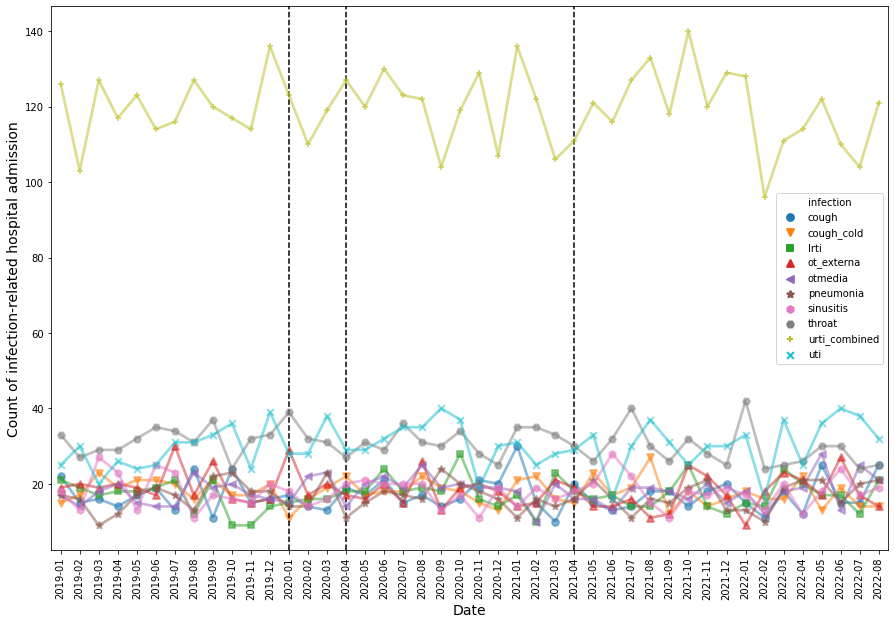

In [12]:
plt.figure(figsize=(15,10))

g = sns.pointplot(data=data_groupby_date_infectoion, y="event_admitted", x="date", hue="infection", 
                markers=['o', 'v', 's', '^', '<', '*', 'h', 'H', '+', 'x', '1', '2', '3', '4', '5'], 
                plot_kws=dict(alpha=0.5))

plt.setp(g.collections, alpha=.5) #alpha for markers
plt.setp(g.lines, alpha=.5) #alpha for line

g.axvline(x=12, color='black', ls='--', lw=1.5) #"2020-01"
g.axvline(x=15, color='black', ls='--', lw=1.5) # "2020-04"
g.axvline(x=27, color='black', ls='--', lw=1.5) # "2021-04"

plt.xticks(rotation=90)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Count of infection-related hospital admission', fontsize=14)
# plt.title('Rate of hospital admission ralated to common infections', fontsize=16)
# plt.legend([],[], frameon=False)
# ax.set_xticklabels([])
# plt.tight_layout()
plt.savefig('../output/hosp_plots/hosp_count.jpg')
plt.show()

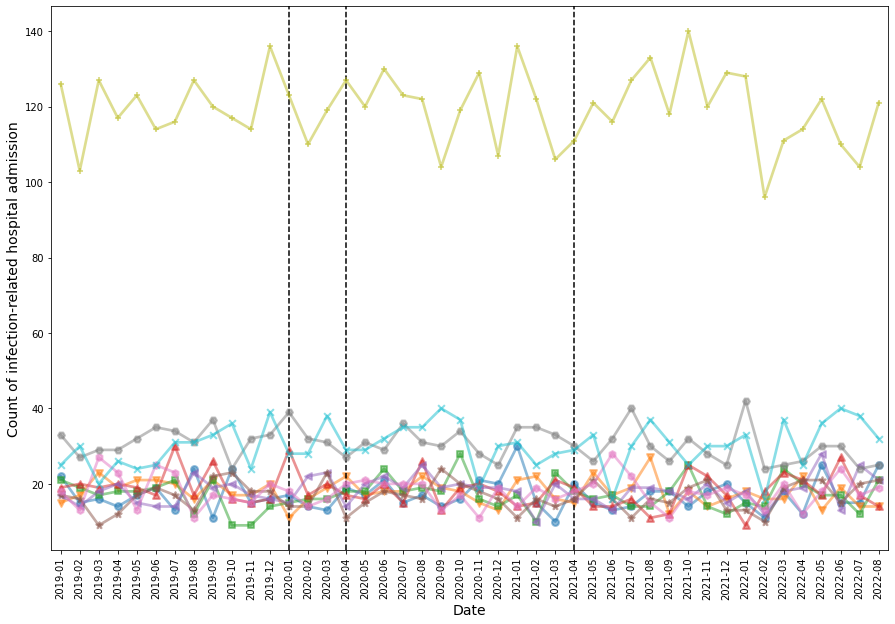

In [13]:
plt.figure(figsize=(15,10))

g = sns.pointplot(data=data_groupby_date_infectoion, y="event_admitted", x="date", hue="infection", 
                markers=['o', 'v', 's', '^', '<', '*', 'h', 'H', '+', 'x', '1', '2', '3', '4', '5'], 
                plot_kws=dict(alpha=0.5))

plt.setp(g.collections, alpha=.5) #alpha for markers
plt.setp(g.lines, alpha=.5) #alpha for line

g.axvline(x=12, color='black', ls='--', lw=1.5) #"2020-01"
g.axvline(x=15, color='black', ls='--', lw=1.5) # "2020-04"
g.axvline(x=27, color='black', ls='--', lw=1.5) # "2021-04"

plt.xticks(rotation=90)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Count of infection-related hospital admission', fontsize=14)
# plt.title('Rate of hospital admission ralated to common infections', fontsize=16)
plt.legend([],[], frameon=False)
# ax.set_xticklabels([])
# plt.tight_layout()
plt.savefig('../output/hosp_plots/hosp_count_nolegend.jpg')
plt.show()

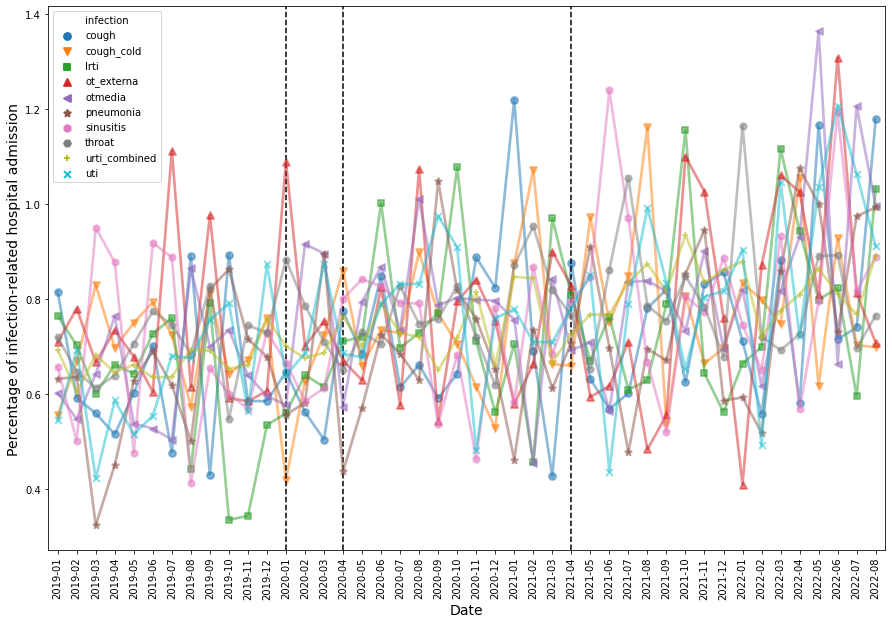

In [14]:
plt.figure(figsize=(15,10))

g = sns.pointplot(data=data_groupby_date_infectoion, y="hosp_perc", x="date", hue="infection", 
                markers=['o', 'v', 's', '^', '<', '*', 'h', 'H', '+', 'x', '1', '2', '3', '4', '5'], 
                plot_kws=dict(alpha=0.5))

plt.setp(g.collections, alpha=.5) #alpha for markers
plt.setp(g.lines, alpha=.5) #alpha for line

g.axvline(x=12, color='black', ls='--', lw=1.5) #"2020-01"
g.axvline(x=15, color='black', ls='--', lw=1.5) # "2020-04"
g.axvline(x=27, color='black', ls='--', lw=1.5) # "2021-01"

plt.xticks(rotation=90)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Percentage of infection-related hospital admission', fontsize=14)
# plt.title('Rate of hospital admission ralated to common infections', fontsize=16)
# plt.legend([],[], frameon=False)
# ax.set_xticklabels([])
# plt.tight_layout()
plt.savefig('../output/hosp_plots/hosp_percentage.jpg')
plt.show()

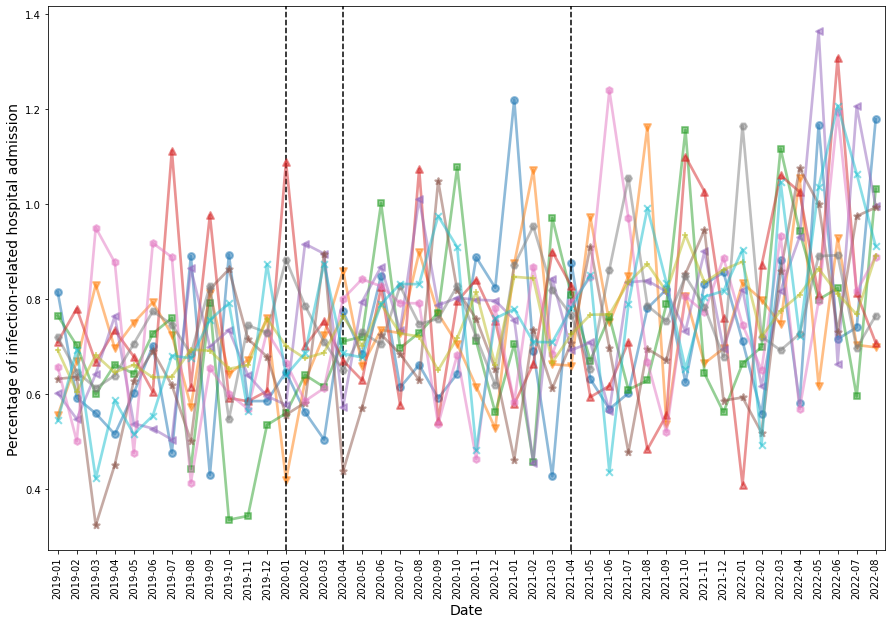

In [15]:
plt.figure(figsize=(15,10))

g = sns.pointplot(data=data_groupby_date_infectoion, y="hosp_perc", x="date", hue="infection", 
                markers=['o', 'v', 's', '^', '<', '*', 'h', 'H', '+', 'x', '1', '2', '3', '4', '5'], 
                plot_kws=dict(alpha=0.5))

plt.setp(g.collections, alpha=.5) #alpha for markers
plt.setp(g.lines, alpha=.5) #alpha for line

g.axvline(x=12, color='black', ls='--', lw=1.5) #"2020-01"
g.axvline(x=15, color='black', ls='--', lw=1.5) # "2020-04"
g.axvline(x=27, color='black', ls='--', lw=1.5) # "2021-01"

plt.xticks(rotation=90)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Percentage of infection-related hospital admission', fontsize=14)
# plt.title('Rate of hospital admission ralated to common infections', fontsize=16)
plt.legend([],[], frameon=False)
# ax.set_xticklabels([])
# plt.tight_layout()
plt.savefig('../output/hosp_plots/hosp_percentage_nolegend.jpg')
plt.show()

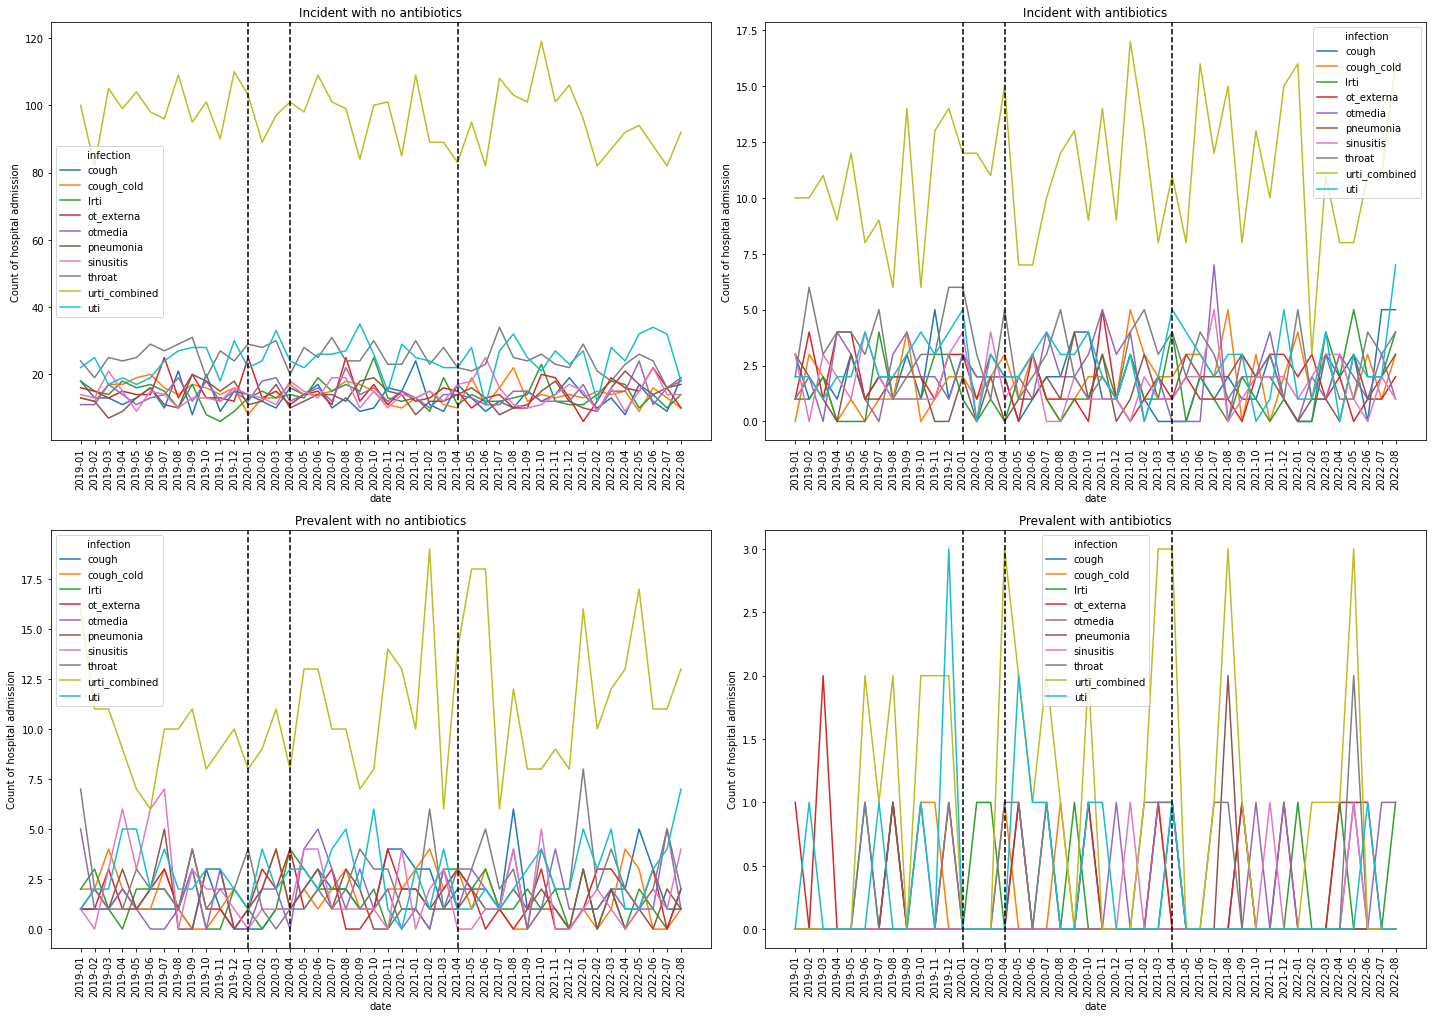

In [16]:
fig, axes = plt.subplots(2,2,
                        figsize=(20, 15)
                        )
create_lineplot('hosp_no_ab_incdt', 'infection', 'Incident with no antibiotics', 'Count of hospital admission', axes[0,0])
create_lineplot('hosp_ab_incdt', 'infection', 'Incident with antibiotics', 'Count of hospital admission', axes[0,1])
create_lineplot('hosp_no_ab_prevl', 'infection', 'Prevalent with no antibiotics', 'Count of hospital admission', axes[1,0])
create_lineplot('hosp_ab_prevl', 'infection', 'Prevalent with antibiotics', 'Count of hospital admission', axes[1,1])
# fig.delaxes(ax=axes[6,1])

fig.tight_layout(rect=[0, 0.03, 1, 0.98])
#plt.tight_layout()
plt.savefig('../output/hosp_plots/hosp_count_incdt_prevl_noabs_abs.jpg')
plt.show()

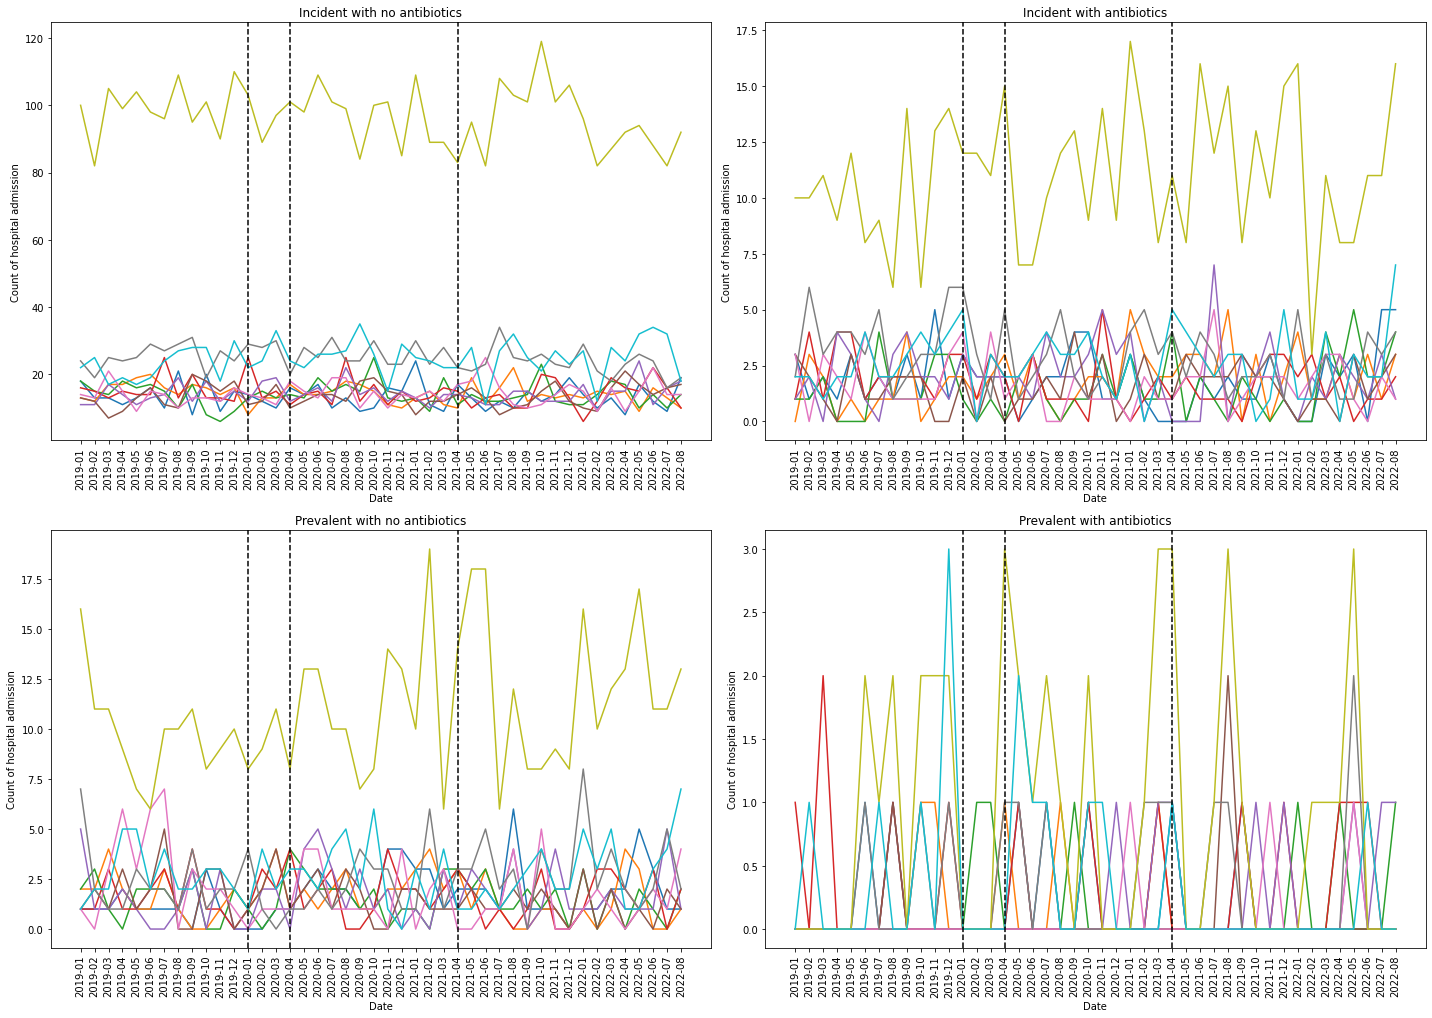

In [17]:
fig, axes = plt.subplots(2,2,
                        figsize=(20, 15)
                        )
create_lineplot_nolegend('hosp_no_ab_incdt', 'infection', 'Incident with no antibiotics', 'Count of hospital admission', axes[0,0])
create_lineplot_nolegend('hosp_ab_incdt', 'infection', 'Incident with antibiotics', 'Count of hospital admission', axes[0,1])
create_lineplot_nolegend('hosp_no_ab_prevl', 'infection', 'Prevalent with no antibiotics', 'Count of hospital admission', axes[1,0])
create_lineplot_nolegend('hosp_ab_prevl', 'infection', 'Prevalent with antibiotics', 'Count of hospital admission', axes[1,1])
# fig.delaxes(ax=axes[6,1])

fig.tight_layout(rect=[0, 0.03, 1, 0.98])
#plt.tight_layout()
plt.savefig('../output/hosp_plots/hosp_count_incdt_prevl_noabs_abs_nolegend.jpg')
plt.show()

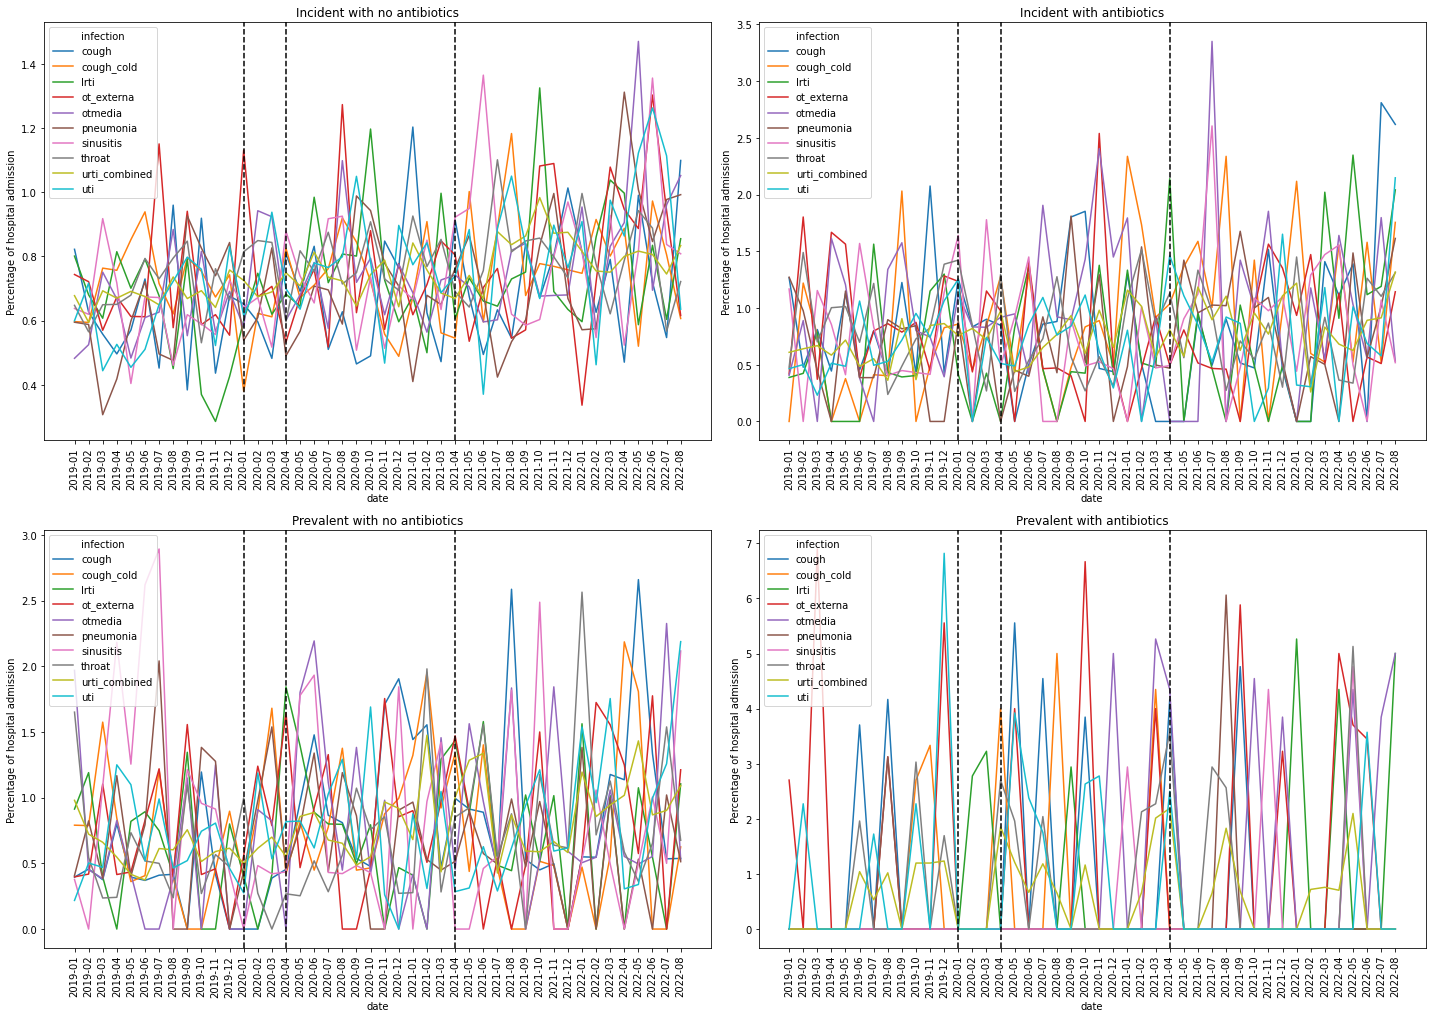

In [18]:
fig, axes = plt.subplots(2,2,
                        figsize=(20, 15)
                        )
create_lineplot('hosp_perc_no_ab_incdt', 'infection', 'Incident with no antibiotics', 'Percentage of hospital admission', axes[0,0])
create_lineplot('hosp_perc_ab_incdt', 'infection', 'Incident with antibiotics', 'Percentage of hospital admission', axes[0,1])
create_lineplot('hosp_perc_no_ab_prevl', 'infection', 'Prevalent with no antibiotics', 'Percentage of hospital admission', axes[1,0])
create_lineplot('hosp_perc_ab_prevl', 'infection', 'Prevalent with antibiotics', 'Percentage of hospital admission', axes[1,1])
# fig.delaxes(ax=axes[6,1])

fig.tight_layout(rect=[0, 0.03, 1, 0.98])
#plt.tight_layout()
plt.savefig('../output/hosp_plots/hosp_percentage_incdt_prevl_noabs_abs.jpg')
plt.show()

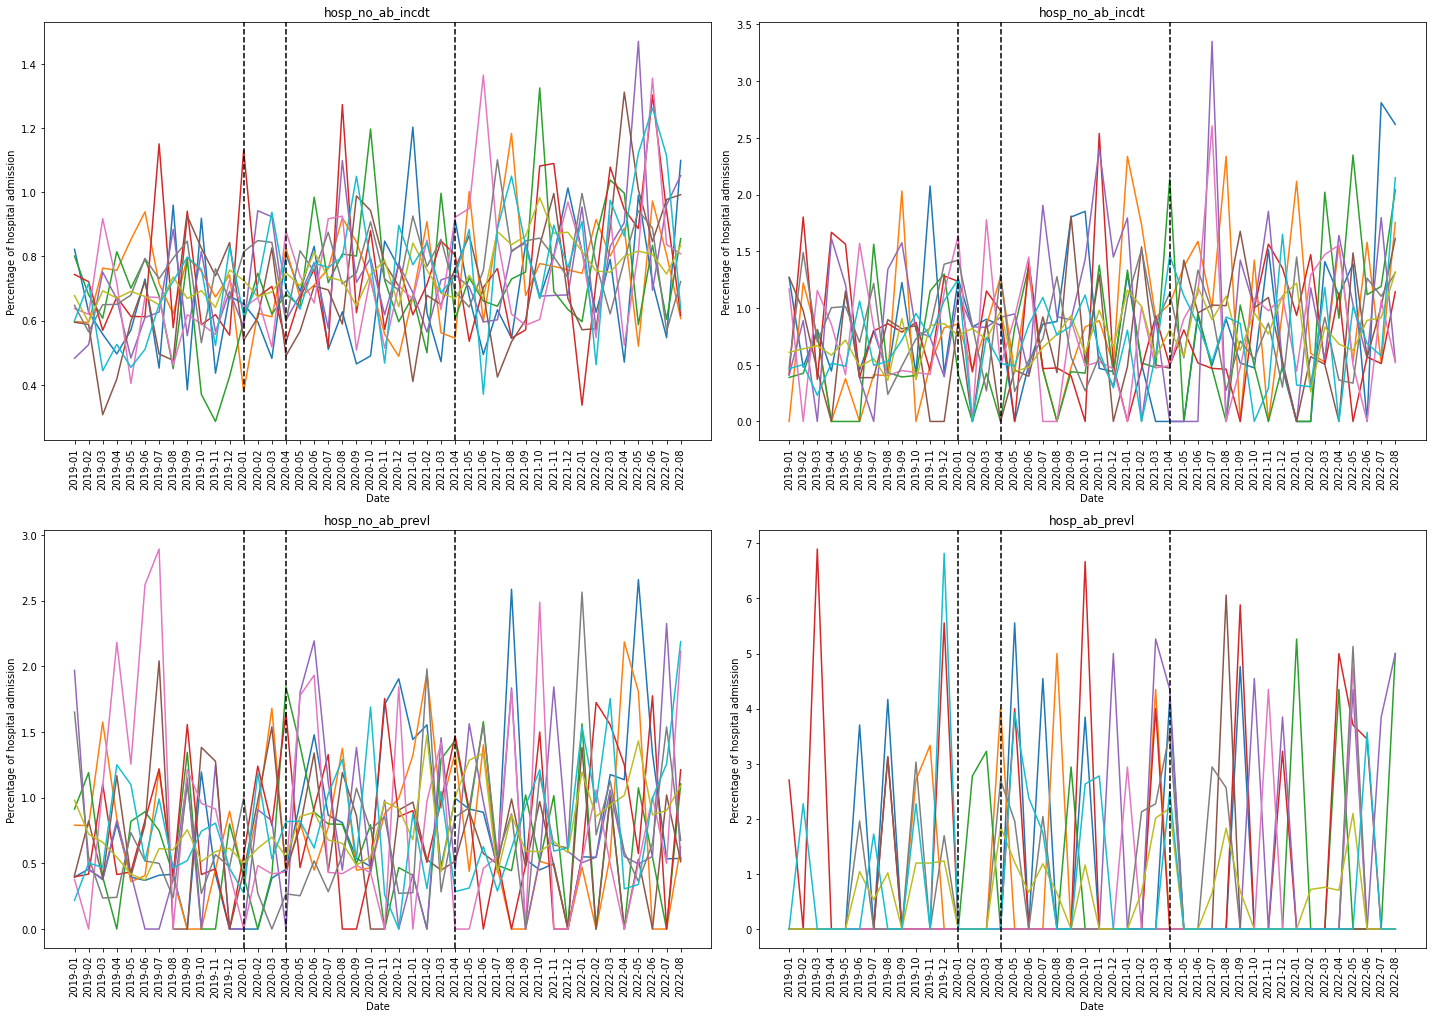

In [19]:
fig, axes = plt.subplots(2,2,
                        figsize=(20, 15)
                        )
create_lineplot_nolegend('hosp_perc_no_ab_incdt', 'infection', 'hosp_no_ab_incdt', 'Percentage of hospital admission', axes[0,0])
create_lineplot_nolegend('hosp_perc_ab_incdt', 'infection', 'hosp_no_ab_incdt', 'Percentage of hospital admission', axes[0,1])
create_lineplot_nolegend('hosp_perc_no_ab_prevl', 'infection', 'hosp_no_ab_prevl', 'Percentage of hospital admission', axes[1,0])
create_lineplot_nolegend('hosp_perc_ab_prevl', 'infection', 'hosp_ab_prevl', 'Percentage of hospital admission', axes[1,1])
# fig.delaxes(ax=axes[6,1])

fig.tight_layout(rect=[0, 0.03, 1, 0.98])
#plt.tight_layout()
plt.savefig('../output/hosp_plots/hosp_percentage_incdt_prevl_noabs_abs_nolegend.jpg')
plt.show()